In [2]:
#import dependencies
#%matplotlib
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [3]:
#Establish CSV File
#Populations_Estimates_Data = "..\Population-EstimatesData.csv"

In [4]:
#Read CSV
Populations_df = pd.read_csv(r"C:\Users\astro\OneDrive/Population-EstimatesData.csv")
Populations_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Unnamed: 95
0,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.201290,...,54.356396,54.502067,54.676725,54.874161,55.102246,55.331887,55.562180,55.789065,56.009450,NaN
1,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.947790,...,13.345549,13.732773,14.132766,14.544481,14.946251,15.349197,15.755873,16.168726,16.589418,NaN
2,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.872972,...,40.542064,40.345297,40.162781,39.987572,39.845466,39.699290,39.546177,39.380479,39.197560,NaN
3,Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Clean the dataframe and include only what data is needed to create a new dataframe
# Only keep: "Country Name", "Indicator Name", "1970", "2020",
Clean_df = Populations_df[["Country Name", "Indicator Name", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
Clean_df.head()

,Country Name,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,Age dependency ratio (% of working-age populat...,94.226666,94.523203,94.591661,94.482288,94.247142,93.937691,93.803991,93.559940,...,63.913830,63.201624,62.572328,62.089329,61.730765,61.446530,61.195307,61.283615,61.253952,61.165474
1,Arab World,"Age dependency ratio, old",7.073558,7.118325,7.148210,7.161073,7.153342,7.125598,7.113481,7.081019,...,6.676818,6.661625,6.668728,6.686883,6.720703,6.776496,6.858187,6.981482,7.121446,7.273785
2,Arab World,"Age dependency ratio, young",86.848912,87.099372,87.114059,86.952269,86.681525,86.360651,86.191005,85.936975,...,55.247367,54.517731,53.919135,53.468340,53.136254,52.861795,52.595712,52.611349,52.496423,52.313363
3,Arab World,"Age population, age 00, female, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,"Age population, age 00, male, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Set new index to Country Name
df = Clean_df.set_index("Country Name")
df.head()

,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,Age dependency ratio (% of working-age populat...,94.226666,94.523203,94.591661,94.482288,94.247142,93.937691,93.803991,93.559940,93.224821,...,63.913830,63.201624,62.572328,62.089329,61.730765,61.446530,61.195307,61.283615,61.253952,61.165474
Arab World,"Age dependency ratio, old",7.073558,7.118325,7.148210,7.161073,7.153342,7.125598,7.113481,7.081019,7.035085,...,6.676818,6.661625,6.668728,6.686883,6.720703,6.776496,6.858187,6.981482,7.121446,7.273785
Arab World,"Age dependency ratio, young",86.848912,87.099372,87.114059,86.952269,86.681525,86.360651,86.191005,85.936975,85.613171,...,55.247367,54.517731,53.919135,53.468340,53.136254,52.861795,52.595712,52.611349,52.496423,52.313363
Arab World,"Age population, age 00, female, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,"Age population, age 00, male, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Specify Regions
Specified_df = df.loc[["Central Europe and the Baltics", "East Asia & Pacific", "European Union",
                                "Latin America & Caribbean", "Middle East & North Africa", "South Asia", "Sub-Saharan Africa", "United States"]]
Specified_df

,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.225484e+01,5.193307e+01,5.158214e+01,5.144332e+01,5.161769e+01,5.207665e+01,5.284028e+01,5.371526e+01,...,4.300973e+01,4.320040e+01,4.377941e+01,4.438222e+01,4.506389e+01,4.589988e+01,4.691707e+01,4.793703e+01,4.922280e+01,5.064542e+01
Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,1.474930e+01,1.508839e+01,1.541455e+01,1.574281e+01,1.607799e+01,1.646924e+01,1.688014e+01,1.723431e+01,...,2.135785e+01,2.162773e+01,2.211606e+01,2.269882e+01,2.336928e+01,2.410862e+01,2.490341e+01,2.582467e+01,2.679701e+01,2.779961e+01
Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,3.745300e+01,3.680275e+01,3.613265e+01,3.566803e+01,3.550635e+01,3.557159e+01,3.591710e+01,3.642405e+01,...,2.159023e+01,2.150695e+01,2.159585e+01,2.161505e+01,2.162610e+01,2.172330e+01,2.194739e+01,2.204940e+01,2.236748e+01,2.279319e+01
Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Rural population growth (annual %),1.511424e-01,1.222655e+00,1.032618e+00,9.165575e-01,8.757273e-01,9.480373e-01,9.122585e-01,9.677961e-01,1.025380e+00,...,1.413321e-02,-3.034315e-02,-1.725391e-01,-1.889727e-01,-2.646566e-01,-2.546842e-01,-2.831369e-01,-3.241316e-01,-4.460271e-01,-4.902593e-01
United States,Sex ratio at birth (male births per female bir...,NaN,NaN,1.053000e+00,NaN,NaN,NaN,NaN,1.052000e+00,NaN,...,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.047000e+00,1.047000e+00,1.047000e+00,NaN
United States,Urban population,1.509224e+08,1.528655e+08,1.545317e+08,1.560350e+08,1.574885e+08,1.590706e+08,1.606111e+08,1.622567e+08,1.640051e+08,...,2.472763e+08,2.498489e+08,2.522053e+08,2.546116e+08,2.569518e+08,2.594308e+08,2.619537e+08,2.644727e+08,2.668092e+08,2.691148e+08


In [8]:
#Reset the index, move it back into a column
reset_df = Specified_df.reset_index(level='Country Name')
reset_df

,Country Name,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.225484e+01,5.193307e+01,5.158214e+01,5.144332e+01,5.161769e+01,5.207665e+01,5.284028e+01,...,4.300973e+01,4.320040e+01,4.377941e+01,4.438222e+01,4.506389e+01,4.589988e+01,4.691707e+01,4.793703e+01,4.922280e+01,5.064542e+01
1,Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,1.474930e+01,1.508839e+01,1.541455e+01,1.574281e+01,1.607799e+01,1.646924e+01,1.688014e+01,...,2.135785e+01,2.162773e+01,2.211606e+01,2.269882e+01,2.336928e+01,2.410862e+01,2.490341e+01,2.582467e+01,2.679701e+01,2.779961e+01
2,Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,3.745300e+01,3.680275e+01,3.613265e+01,3.566803e+01,3.550635e+01,3.557159e+01,3.591710e+01,...,2.159023e+01,2.150695e+01,2.159585e+01,2.161505e+01,2.162610e+01,2.172330e+01,2.194739e+01,2.204940e+01,2.236748e+01,2.279319e+01
3,Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,United States,Rural population growth (annual %),1.511424e-01,1.222655e+00,1.032618e+00,9.165575e-01,8.757273e-01,9.480373e-01,9.122585e-01,9.677961e-01,...,1.413321e-02,-3.034315e-02,-1.725391e-01,-1.889727e-01,-2.646566e-01,-2.546842e-01,-2.831369e-01,-3.241316e-01,-4.460271e-01,-4.902593e-01
1396,United States,Sex ratio at birth (male births per female bir...,NaN,NaN,1.053000e+00,NaN,NaN,NaN,NaN,1.052000e+00,...,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.047000e+00,1.047000e+00,1.047000e+00,NaN
1397,United States,Urban population,1.509224e+08,1.528655e+08,1.545317e+08,1.560350e+08,1.574885e+08,1.590706e+08,1.606111e+08,1.622567e+08,...,2.472763e+08,2.498489e+08,2.522053e+08,2.546116e+08,2.569518e+08,2.594308e+08,2.619537e+08,2.644727e+08,2.668092e+08,2.691148e+08
1398,United States,Urban population (% of total population),7.360200e+01,7.361300e+01,7.362300e+01,7.363300e+01,7.364300e+01,7.365300e+01,7.366300e+01,7.367300e+01,...,8.060600e+01,8.077200e+01,8.094400e+01,8.111900e+01,8.129900e+01,8.148300e+01,8.167100e+01,8.186200e+01,8.205800e+01,8.225600e+01


In [9]:
# Turn Indicator Name into an Index
Indexed_df = reset_df.set_index("Indicator Name")
Indexed_df.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Age dependency ratio (% of working-age population),Central Europe and the Baltics,52.375566,52.254844,51.933073,51.582140,51.443323,51.617688,52.076651,52.840284,53.715259,...,43.009734,43.200405,43.779407,44.382225,45.063891,45.899876,46.917068,47.937029,49.222801,50.645418
"Age dependency ratio, old",Central Europe and the Baltics,14.387453,14.749303,15.088387,15.414548,15.742809,16.077992,16.469243,16.880140,17.234313,...,21.357849,21.627734,22.116059,22.698818,23.369281,24.108615,24.903405,25.824670,26.797009,27.799608
"Age dependency ratio, young",Central Europe and the Baltics,37.922797,37.452995,36.802752,36.132650,35.668026,35.506350,35.571588,35.917100,36.424053,...,21.590227,21.506953,21.595850,21.615052,21.626101,21.723296,21.947391,22.049400,22.367483,22.793186
"Age population, age 00, female, interpolated",Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Age population, age 00, male, interpolated",Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Specify the valid indicators for the Rural Total
reduced_rural_total = Indexed_df.loc[["Rural population (% of total population)"]]
reduced_rural_total

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Rural population (% of total population),Central Europe and the Baltics,49.219724,48.573344,47.853531,47.134042,46.414570,45.705534,45.007746,44.294932,43.565724,...,38.013953,37.973935,37.936066,37.918223,37.903186,37.886355,37.859317,37.815521,37.751446,37.667924
Rural population (% of total population),East Asia & Pacific,75.047531,74.964251,74.861091,74.699660,74.415375,74.280249,74.102144,73.913567,73.520261,...,49.082559,48.054663,47.123118,46.225991,45.336350,44.447625,43.561579,42.678541,41.803436,40.947211
Rural population (% of total population),European Union,34.327104,33.950671,33.575593,33.218345,32.872742,32.565193,32.282596,31.982632,31.674010,...,26.213376,25.990940,25.777396,25.573641,25.376689,25.182684,24.977388,24.766693,24.553508,24.334352
Rural population (% of total population),Latin America & Caribbean,42.733384,41.976092,41.225280,40.497653,39.777048,39.057038,38.340183,37.623983,36.910236,...,21.749303,21.473239,21.196393,20.924832,20.659693,20.399923,20.145987,19.898426,19.655950,19.416709
Rural population (% of total population),Middle East & North Africa,57.346055,56.597049,55.837390,55.064135,54.324084,53.610441,52.908843,52.261151,51.636131,...,37.761991,37.343379,36.997998,36.659711,36.325677,35.999930,35.629099,35.280452,34.947420,34.628026
Rural population (% of total population),South Asia,81.362281,81.119500,80.792092,80.455853,80.100778,79.717044,79.326767,78.929039,78.521874,...,69.546055,69.182633,68.816109,68.439293,68.055554,67.663154,67.262439,66.853675,66.435863,66.007639
Rural population (% of total population),Sub-Saharan Africa,81.874923,81.470982,81.051629,80.628903,80.206519,79.771981,79.322146,78.878849,78.430127,...,64.521962,64.001617,63.476144,62.962771,62.448887,61.930896,61.408927,60.883835,60.355338,59.823177
Rural population (% of total population),United States,26.398000,26.387000,26.377000,26.367000,26.357000,26.347000,26.337000,26.327000,26.318000,...,19.394000,19.228000,19.056000,18.881000,18.701000,18.517000,18.329000,18.138000,17.942000,17.744000


In [11]:
#check the datatypes
reduced_rural_total.dtypes

Country Name     object
1970            float64
1971            float64
1972            float64
1973            float64
1974            float64
1975            float64
1976            float64
1977            float64
1978            float64
1979            float64
1980            float64
1981            float64
1982            float64
1983            float64
1984            float64
1985            float64
1986            float64
1987            float64
1988            float64
1989            float64
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            

In [12]:
#Convert the column floats to integers
#ols = ['1970', '1971','1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
#educed_rural_df[cols] = reduced_rural_df[cols].applymap(np.int64)
#educed_rural_df

In [13]:
#Move the Indicator Name index back into a column
reduced_rural_total2 = reduced_rural_total.reset_index(level='Indicator Name')
reduced_rural_total2

,Indicator Name,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Rural population (% of total population),Central Europe and the Baltics,49.219724,48.573344,47.853531,47.134042,46.414570,45.705534,45.007746,44.294932,...,38.013953,37.973935,37.936066,37.918223,37.903186,37.886355,37.859317,37.815521,37.751446,37.667924
1,Rural population (% of total population),East Asia & Pacific,75.047531,74.964251,74.861091,74.699660,74.415375,74.280249,74.102144,73.913567,...,49.082559,48.054663,47.123118,46.225991,45.336350,44.447625,43.561579,42.678541,41.803436,40.947211
2,Rural population (% of total population),European Union,34.327104,33.950671,33.575593,33.218345,32.872742,32.565193,32.282596,31.982632,...,26.213376,25.990940,25.777396,25.573641,25.376689,25.182684,24.977388,24.766693,24.553508,24.334352
3,Rural population (% of total population),Latin America & Caribbean,42.733384,41.976092,41.225280,40.497653,39.777048,39.057038,38.340183,37.623983,...,21.749303,21.473239,21.196393,20.924832,20.659693,20.399923,20.145987,19.898426,19.655950,19.416709
4,Rural population (% of total population),Middle East & North Africa,57.346055,56.597049,55.837390,55.064135,54.324084,53.610441,52.908843,52.261151,...,37.761991,37.343379,36.997998,36.659711,36.325677,35.999930,35.629099,35.280452,34.947420,34.628026
5,Rural population (% of total population),South Asia,81.362281,81.119500,80.792092,80.455853,80.100778,79.717044,79.326767,78.929039,...,69.546055,69.182633,68.816109,68.439293,68.055554,67.663154,67.262439,66.853675,66.435863,66.007639
6,Rural population (% of total population),Sub-Saharan Africa,81.874923,81.470982,81.051629,80.628903,80.206519,79.771981,79.322146,78.878849,...,64.521962,64.001617,63.476144,62.962771,62.448887,61.930896,61.408927,60.883835,60.355338,59.823177
7,Rural population (% of total population),United States,26.398000,26.387000,26.377000,26.367000,26.357000,26.347000,26.337000,26.327000,...,19.394000,19.228000,19.056000,18.881000,18.701000,18.517000,18.329000,18.138000,17.942000,17.744000


In [14]:
# Reorganize the columns where Country Name comes before Indicator Name
organized_rural_total = reduced_rural_total2[["Country Name","1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
organized_rural_total.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,49.219724,48.573344,47.853531,47.134042,46.414570,45.705534,45.007746,44.294932,43.565724,...,38.013953,37.973935,37.936066,37.918223,37.903186,37.886355,37.859317,37.815521,37.751446,37.667924
1,East Asia & Pacific,75.047531,74.964251,74.861091,74.699660,74.415375,74.280249,74.102144,73.913567,73.520261,...,49.082559,48.054663,47.123118,46.225991,45.336350,44.447625,43.561579,42.678541,41.803436,40.947211
2,European Union,34.327104,33.950671,33.575593,33.218345,32.872742,32.565193,32.282596,31.982632,31.674010,...,26.213376,25.990940,25.777396,25.573641,25.376689,25.182684,24.977388,24.766693,24.553508,24.334352
3,Latin America & Caribbean,42.733384,41.976092,41.225280,40.497653,39.777048,39.057038,38.340183,37.623983,36.910236,...,21.749303,21.473239,21.196393,20.924832,20.659693,20.399923,20.145987,19.898426,19.655950,19.416709
4,Middle East & North Africa,57.346055,56.597049,55.837390,55.064135,54.324084,53.610441,52.908843,52.261151,51.636131,...,37.761991,37.343379,36.997998,36.659711,36.325677,35.999930,35.629099,35.280452,34.947420,34.628026


In [15]:
organized_rural_total2 = organized_rural_total.set_index("Country Name")
organized_rural_total2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,49.219724,48.573344,47.853531,47.134042,46.414570,45.705534,45.007746,44.294932,43.565724,42.895942,...,38.013953,37.973935,37.936066,37.918223,37.903186,37.886355,37.859317,37.815521,37.751446,37.667924
East Asia & Pacific,75.047531,74.964251,74.861091,74.699660,74.415375,74.280249,74.102144,73.913567,73.520261,72.908467,...,49.082559,48.054663,47.123118,46.225991,45.336350,44.447625,43.561579,42.678541,41.803436,40.947211
European Union,34.327104,33.950671,33.575593,33.218345,32.872742,32.565193,32.282596,31.982632,31.674010,31.374421,...,26.213376,25.990940,25.777396,25.573641,25.376689,25.182684,24.977388,24.766693,24.553508,24.334352
Latin America & Caribbean,42.733384,41.976092,41.225280,40.497653,39.777048,39.057038,38.340183,37.623983,36.910236,36.203056,...,21.749303,21.473239,21.196393,20.924832,20.659693,20.399923,20.145987,19.898426,19.655950,19.416709
Middle East & North Africa,57.346055,56.597049,55.837390,55.064135,54.324084,53.610441,52.908843,52.261151,51.636131,51.016948,...,37.761991,37.343379,36.997998,36.659711,36.325677,35.999930,35.629099,35.280452,34.947420,34.628026
South Asia,81.362281,81.119500,80.792092,80.455853,80.100778,79.717044,79.326767,78.929039,78.521874,78.103495,...,69.546055,69.182633,68.816109,68.439293,68.055554,67.663154,67.262439,66.853675,66.435863,66.007639
Sub-Saharan Africa,81.874923,81.470982,81.051629,80.628903,80.206519,79.771981,79.322146,78.878849,78.430127,78.035355,...,64.521962,64.001617,63.476144,62.962771,62.448887,61.930896,61.408927,60.883835,60.355338,59.823177
United States,26.398000,26.387000,26.377000,26.367000,26.357000,26.347000,26.337000,26.327000,26.318000,26.308000,...,19.394000,19.228000,19.056000,18.881000,18.701000,18.517000,18.329000,18.138000,17.942000,17.744000


In [16]:
# Create a CSV file for rural
organized_rural_total2.to_csv("Population-Estimates_Rural_Total_Ian.csv",
                  index=False, header=True)

In [17]:
# Create a series for 1970-2018
series1 = organized_rural_total2.loc["Central Europe and the Baltics"]
series2 = organized_rural_total2.loc["East Asia & Pacific"]
series3 = organized_rural_total2.loc["European Union"]
series4 = organized_rural_total2.loc["Latin America & Caribbean"]
series5 = organized_rural_total2.loc["Middle East & North Africa"]
series6 = organized_rural_total2.loc["South Asia"]
series7 = organized_rural_total2.loc["Sub-Saharan Africa"]
series8 = organized_rural_total2.loc["United States"]




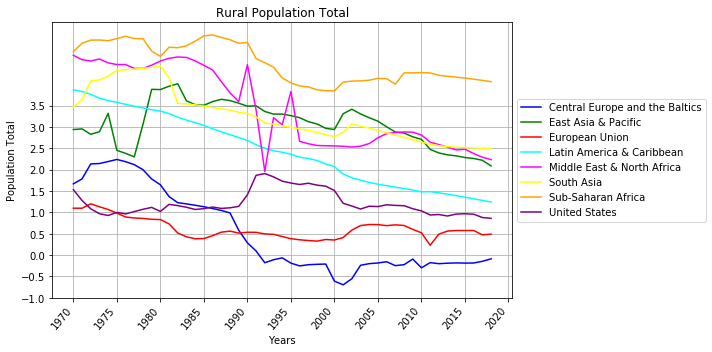

In [45]:
# Create a line graph for rural
#Create a list of years that will be used for the x-axis
years = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

plt.figure(figsize=(10,5))
# Plot line
plt.plot(years, series1, color="blue", label="Central Europe and the Baltics")
plt.plot(years, series2, color="green", label="East Asia & Pacific")
plt.plot(years, series3, color="red", label="European Union")
plt.plot(years, series4, color="cyan", label="Latin America & Caribbean")
plt.plot(years, series5, color="magenta", label="Middle East & North Africa")
plt.plot(years, series6, color="yellow", label="South Asia")
plt.plot(years, series7, color="orange", label="Sub-Saharan Africa")
plt.plot(years, series8, color="purple", label="United States")

# Place a legend on the chart
legend = plt.legend(loc="best")
legend.get_frame().set_facecolor('none')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Rural Population Total")
plt.xlabel("Years")
plt.xticks(np.arange(1970,2025,5), rotation=50, ha= 'right')
plt.ylabel("Population Total")
plt.yticks(np.arange(-1, 4, 0.5))
plt.grid(True)

plt.tight_layout()

#Save the plotted figures as .pngs
plt.savefig("Rural_Total.png")

# Print our chart to the screen
plt.show()

In [19]:
# Specify the valid indicators for the Rural Total
reduced_rural_growth = Indexed_df.loc[["Rural population growth (annual %)"]]
reduced_rural_growth










#country_names = organized_rural_df.loc["Country Name"]
#"European Union", "Central Europe and the Baltics", "Sub Saharan Africa", "United States", "Latin America and Caribbean", "Middle East and North Africa", "East Asia and Pacific", "South Asia"]]
#Rural_Total = plt.plot(years, country_names)
#, "Rural population ( % of total population)", color="blue") 
#label="Rural Total Percentage" )

#Rural_Growth = plt.plot(years, country_names)
#, "Rural population growth (annual %)", color="green") 
#label="Rural Growth Percentage" )

#plt.legend(handles=[Rural_Total, Rural_Growth])

#plt.show()

           

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Rural population growth (annual %),Central Europe and the Baltics,-0.605830,-0.814805,-0.768100,-0.762014,-0.720793,-0.638280,-0.650255,-0.786368,-0.976397,...,-0.353042,-0.466558,-0.336419,-0.276084,-0.252771,-0.254073,-0.301577,-0.370479,-0.417083,-0.441635
Rural population growth (annual %),East Asia & Pacific,2.512721,2.497808,2.264527,2.010762,1.780336,1.728561,1.433531,1.300621,0.988010,...,-1.386660,-1.432068,-1.281393,-1.235039,-1.256863,-1.288338,-1.328975,-1.355103,-1.381925,-1.454848
Rural population growth (annual %),European Union,-0.540848,-0.581480,-0.483104,-0.480191,-0.499059,-0.417882,-0.400396,-0.509734,-0.565628,...,-0.537924,-0.630882,-0.879211,-0.575817,-0.475162,-0.451836,-0.517837,-0.551564,-0.672163,-0.694761
Rural population growth (annual %),Latin America & Caribbean,0.733065,0.655900,0.604267,0.598505,0.556270,0.499061,0.446815,0.386101,0.335095,...,-0.129221,-0.160227,-0.174994,-0.186286,-0.192942,-0.210561,-0.225086,-0.237262,-0.255893,-0.286693
Rural population growth (annual %),Middle East & North Africa,1.443245,1.427070,1.365345,1.366226,1.424519,1.501430,1.557320,1.692484,1.788780,...,1.050794,0.993899,1.135766,1.105307,1.061771,1.026054,0.838220,0.829669,0.805436,0.805628
Rural population growth (annual %),South Asia,2.029647,1.992077,1.888688,1.885486,1.876606,1.858760,1.867456,1.870115,1.865842,...,0.958357,0.904859,0.850553,0.781990,0.740056,0.698073,0.660767,0.628008,0.590787,0.549865
Rural population growth (annual %),Sub-Saharan Africa,2.170823,2.163749,2.178560,2.206641,2.237989,2.250832,2.257089,2.287512,2.294348,...,1.949866,1.934775,1.920415,1.932546,1.919665,1.896157,1.868883,1.840830,1.810355,1.775481
Rural population growth (annual %),United States,0.151142,1.222655,1.032618,0.916558,0.875727,0.948037,0.912258,0.967796,1.025380,...,0.014133,-0.030343,-0.172539,-0.188973,-0.264657,-0.254684,-0.283137,-0.324132,-0.446027,-0.490259


In [20]:
#Move the Indicator Name index back into a column
reduced_rural_growth2 = reduced_rural_growth.reset_index(level='Indicator Name')
reduced_rural_growth2.head()

,Indicator Name,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Rural population growth (annual %),Central Europe and the Baltics,-0.605830,-0.814805,-0.768100,-0.762014,-0.720793,-0.638280,-0.650255,-0.786368,...,-0.353042,-0.466558,-0.336419,-0.276084,-0.252771,-0.254073,-0.301577,-0.370479,-0.417083,-0.441635
1,Rural population growth (annual %),East Asia & Pacific,2.512721,2.497808,2.264527,2.010762,1.780336,1.728561,1.433531,1.300621,...,-1.386660,-1.432068,-1.281393,-1.235039,-1.256863,-1.288338,-1.328975,-1.355103,-1.381925,-1.454848
2,Rural population growth (annual %),European Union,-0.540848,-0.581480,-0.483104,-0.480191,-0.499059,-0.417882,-0.400396,-0.509734,...,-0.537924,-0.630882,-0.879211,-0.575817,-0.475162,-0.451836,-0.517837,-0.551564,-0.672163,-0.694761
3,Rural population growth (annual %),Latin America & Caribbean,0.733065,0.655900,0.604267,0.598505,0.556270,0.499061,0.446815,0.386101,...,-0.129221,-0.160227,-0.174994,-0.186286,-0.192942,-0.210561,-0.225086,-0.237262,-0.255893,-0.286693
4,Rural population growth (annual %),Middle East & North Africa,1.443245,1.427070,1.365345,1.366226,1.424519,1.501430,1.557320,1.692484,...,1.050794,0.993899,1.135766,1.105307,1.061771,1.026054,0.838220,0.829669,0.805436,0.805628


In [21]:
# Reorganize the columns where Country Name comes before Indicator Name
organized_rural_growth = reduced_rural_growth2[["Country Name","1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
organized_rural_growth.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,-0.605830,-0.814805,-0.768100,-0.762014,-0.720793,-0.638280,-0.650255,-0.786368,-0.976397,...,-0.353042,-0.466558,-0.336419,-0.276084,-0.252771,-0.254073,-0.301577,-0.370479,-0.417083,-0.441635
1,East Asia & Pacific,2.512721,2.497808,2.264527,2.010762,1.780336,1.728561,1.433531,1.300621,0.988010,...,-1.386660,-1.432068,-1.281393,-1.235039,-1.256863,-1.288338,-1.328975,-1.355103,-1.381925,-1.454848
2,European Union,-0.540848,-0.581480,-0.483104,-0.480191,-0.499059,-0.417882,-0.400396,-0.509734,-0.565628,...,-0.537924,-0.630882,-0.879211,-0.575817,-0.475162,-0.451836,-0.517837,-0.551564,-0.672163,-0.694761
3,Latin America & Caribbean,0.733065,0.655900,0.604267,0.598505,0.556270,0.499061,0.446815,0.386101,0.335095,...,-0.129221,-0.160227,-0.174994,-0.186286,-0.192942,-0.210561,-0.225086,-0.237262,-0.255893,-0.286693
4,Middle East & North Africa,1.443245,1.427070,1.365345,1.366226,1.424519,1.501430,1.557320,1.692484,1.788780,...,1.050794,0.993899,1.135766,1.105307,1.061771,1.026054,0.838220,0.829669,0.805436,0.805628


In [22]:
organized_rural_growth2 = organized_rural_growth.set_index("Country Name")
organized_rural_growth2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,-0.605830,-0.814805,-0.768100,-0.762014,-0.720793,-0.638280,-0.650255,-0.786368,-0.976397,-0.958559,...,-0.353042,-0.466558,-0.336419,-0.276084,-0.252771,-0.254073,-0.301577,-0.370479,-0.417083,-0.441635
East Asia & Pacific,2.512721,2.497808,2.264527,2.010762,1.780336,1.728561,1.433531,1.300621,0.988010,0.688746,...,-1.386660,-1.432068,-1.281393,-1.235039,-1.256863,-1.288338,-1.328975,-1.355103,-1.381925,-1.454848
European Union,-0.540848,-0.581480,-0.483104,-0.480191,-0.499059,-0.417882,-0.400396,-0.509734,-0.565628,-0.552068,...,-0.537924,-0.630882,-0.879211,-0.575817,-0.475162,-0.451836,-0.517837,-0.551564,-0.672163,-0.694761
Latin America & Caribbean,0.733065,0.655900,0.604267,0.598505,0.556270,0.499061,0.446815,0.386101,0.335095,0.296528,...,-0.129221,-0.160227,-0.174994,-0.186286,-0.192942,-0.210561,-0.225086,-0.237262,-0.255893,-0.286693
Middle East & North Africa,1.443245,1.427070,1.365345,1.366226,1.424519,1.501430,1.557320,1.692484,1.788780,1.887863,...,1.050794,0.993899,1.135766,1.105307,1.061771,1.026054,0.838220,0.829669,0.805436,0.805628
South Asia,2.029647,1.992077,1.888688,1.885486,1.876606,1.858760,1.867456,1.870115,1.865842,1.853870,...,0.958357,0.904859,0.850553,0.781990,0.740056,0.698073,0.660767,0.628008,0.590787,0.549865
Sub-Saharan Africa,2.170823,2.163749,2.178560,2.206641,2.237989,2.250832,2.257089,2.287512,2.294348,2.373423,...,1.949866,1.934775,1.920415,1.932546,1.919665,1.896157,1.868883,1.840830,1.810355,1.775481
United States,0.151142,1.222655,1.032618,0.916558,0.875727,0.948037,0.912258,0.967796,1.025380,1.065572,...,0.014133,-0.030343,-0.172539,-0.188973,-0.264657,-0.254684,-0.283137,-0.324132,-0.446027,-0.490259


In [23]:
# Create a CSV file for rural
organized_rural_growth2.to_csv("Population-Estimates_Rural_Growth_Ian.csv",
                  index=False, header=True)

In [24]:
# Create a series for 1970-2018
series1 = organized_rural_growth2.loc["Central Europe and the Baltics"]
series2 = organized_rural_growth2.loc["East Asia & Pacific"]
series3 = organized_rural_growth2.loc["European Union"]
series4 = organized_rural_growth2.loc["Latin America & Caribbean"]
series5 = organized_rural_growth2.loc["Middle East & North Africa"]
series6 = organized_rural_growth2.loc["South Asia"]
series7 = organized_rural_growth2.loc["Sub-Saharan Africa"]
series8 = organized_rural_growth2.loc["United States"]

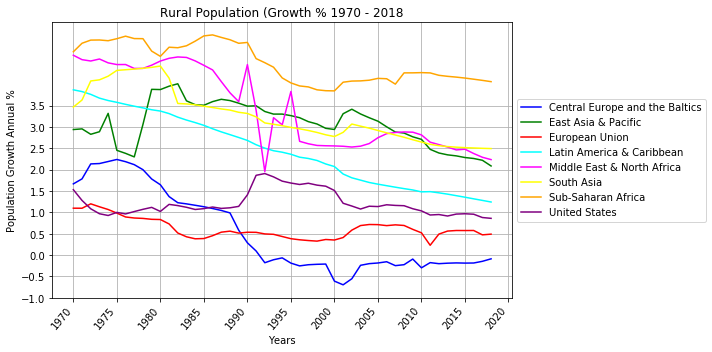

In [44]:
# Create a line graph for rural
#Create a list of years that will be used for the x-axis
years = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

plt.figure(figsize=(10,5))
# Plot line
plt.plot(years, series1, color="blue", label="Central Europe and the Baltics")
plt.plot(years, series2, color="green", label="East Asia & Pacific")
plt.plot(years, series3, color="red", label="European Union")
plt.plot(years, series4, color="cyan", label="Latin America & Caribbean")
plt.plot(years, series5, color="magenta", label="Middle East & North Africa")
plt.plot(years, series6, color="yellow", label="South Asia")
plt.plot(years, series7, color="orange", label="Sub-Saharan Africa")
plt.plot(years, series8, color="purple", label="United States")

# Place a legend on the chart
legend = plt.legend(loc="best")
legend.get_frame().set_facecolor('none')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title("Rural Population (Growth % 1970 - 2018")
plt.xlabel("Years")
plt.xticks(np.arange(1970,2025,5), rotation=50, ha= 'right')
plt.ylabel("Population Growth Annual %")
plt.yticks(np.arange(-1, 4, 0.5))
plt.grid(True)

plt.tight_layout()

#Save the plotted figures as .pngs
plt.savefig("Rural_Growth.png")

# Print our chart to the screen
plt.show()

In [26]:
# Specify the valid indicators for the Urban Total
reduced_urban_total = Indexed_df.loc[["Urban population (% of total population)"]]
reduced_urban_total

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Urban population (% of total population),Central Europe and the Baltics,50.780276,51.426656,52.146469,52.865958,53.585430,54.294466,54.992254,55.705068,56.434276,...,61.986047,62.026065,62.063934,62.081777,62.096814,62.113645,62.140683,62.184479,62.248554,62.332076
Urban population (% of total population),East Asia & Pacific,24.952469,25.035749,25.138909,25.300340,25.584625,25.719751,25.897856,26.086433,26.479739,...,50.917441,51.945337,52.876882,53.774009,54.663650,55.552375,56.438421,57.321459,58.196564,59.052789
Urban population (% of total population),European Union,65.672896,66.049329,66.424407,66.781655,67.127258,67.434807,67.717404,68.017368,68.325990,...,73.786624,74.009060,74.222604,74.426359,74.623311,74.817316,75.022612,75.233307,75.446492,75.665648
Urban population (% of total population),Latin America & Caribbean,57.266616,58.023908,58.774720,59.502347,60.222952,60.942962,61.659817,62.376017,63.089764,...,78.250697,78.526761,78.803607,79.075168,79.340307,79.600077,79.854013,80.101574,80.344050,80.583291
Urban population (% of total population),Middle East & North Africa,42.653945,43.402951,44.162610,44.935865,45.675916,46.389559,47.091157,47.738849,48.363869,...,62.238009,62.656621,63.002002,63.340289,63.674323,64.000070,64.370901,64.719548,65.052580,65.371974
Urban population (% of total population),South Asia,18.637719,18.880500,19.207908,19.544147,19.899222,20.282956,20.673233,21.070961,21.478126,...,30.453945,30.817367,31.183891,31.560707,31.944446,32.336846,32.737561,33.146325,33.564137,33.992361
Urban population (% of total population),Sub-Saharan Africa,18.125077,18.529018,18.948371,19.371097,19.793481,20.228019,20.677854,21.121151,21.569873,...,35.478038,35.998383,36.523856,37.037229,37.551113,38.069104,38.591073,39.116165,39.644662,40.176823
Urban population (% of total population),United States,73.602000,73.613000,73.623000,73.633000,73.643000,73.653000,73.663000,73.673000,73.682000,...,80.606000,80.772000,80.944000,81.119000,81.299000,81.483000,81.671000,81.862000,82.058000,82.256000


In [27]:
#Move the Indicator Name index back into a column
reduced_urban_total2 = reduced_urban_total.reset_index(level='Indicator Name')
reduced_urban_total2.head()

,Indicator Name,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Urban population (% of total population),Central Europe and the Baltics,50.780276,51.426656,52.146469,52.865958,53.585430,54.294466,54.992254,55.705068,...,61.986047,62.026065,62.063934,62.081777,62.096814,62.113645,62.140683,62.184479,62.248554,62.332076
1,Urban population (% of total population),East Asia & Pacific,24.952469,25.035749,25.138909,25.300340,25.584625,25.719751,25.897856,26.086433,...,50.917441,51.945337,52.876882,53.774009,54.663650,55.552375,56.438421,57.321459,58.196564,59.052789
2,Urban population (% of total population),European Union,65.672896,66.049329,66.424407,66.781655,67.127258,67.434807,67.717404,68.017368,...,73.786624,74.009060,74.222604,74.426359,74.623311,74.817316,75.022612,75.233307,75.446492,75.665648
3,Urban population (% of total population),Latin America & Caribbean,57.266616,58.023908,58.774720,59.502347,60.222952,60.942962,61.659817,62.376017,...,78.250697,78.526761,78.803607,79.075168,79.340307,79.600077,79.854013,80.101574,80.344050,80.583291
4,Urban population (% of total population),Middle East & North Africa,42.653945,43.402951,44.162610,44.935865,45.675916,46.389559,47.091157,47.738849,...,62.238009,62.656621,63.002002,63.340289,63.674323,64.000070,64.370901,64.719548,65.052580,65.371974


In [28]:
# Reorganize the columns where Country Name comes before Indicator Name
organized_urban_total = reduced_urban_total2[["Country Name","1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
organized_urban_total.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,50.780276,51.426656,52.146469,52.865958,53.585430,54.294466,54.992254,55.705068,56.434276,...,61.986047,62.026065,62.063934,62.081777,62.096814,62.113645,62.140683,62.184479,62.248554,62.332076
1,East Asia & Pacific,24.952469,25.035749,25.138909,25.300340,25.584625,25.719751,25.897856,26.086433,26.479739,...,50.917441,51.945337,52.876882,53.774009,54.663650,55.552375,56.438421,57.321459,58.196564,59.052789
2,European Union,65.672896,66.049329,66.424407,66.781655,67.127258,67.434807,67.717404,68.017368,68.325990,...,73.786624,74.009060,74.222604,74.426359,74.623311,74.817316,75.022612,75.233307,75.446492,75.665648
3,Latin America & Caribbean,57.266616,58.023908,58.774720,59.502347,60.222952,60.942962,61.659817,62.376017,63.089764,...,78.250697,78.526761,78.803607,79.075168,79.340307,79.600077,79.854013,80.101574,80.344050,80.583291
4,Middle East & North Africa,42.653945,43.402951,44.162610,44.935865,45.675916,46.389559,47.091157,47.738849,48.363869,...,62.238009,62.656621,63.002002,63.340289,63.674323,64.000070,64.370901,64.719548,65.052580,65.371974


In [29]:
organized_urban_total2 = organized_urban_total.set_index("Country Name")
organized_urban_total2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,50.780276,51.426656,52.146469,52.865958,53.585430,54.294466,54.992254,55.705068,56.434276,57.104058,...,61.986047,62.026065,62.063934,62.081777,62.096814,62.113645,62.140683,62.184479,62.248554,62.332076
East Asia & Pacific,24.952469,25.035749,25.138909,25.300340,25.584625,25.719751,25.897856,26.086433,26.479739,27.091533,...,50.917441,51.945337,52.876882,53.774009,54.663650,55.552375,56.438421,57.321459,58.196564,59.052789
European Union,65.672896,66.049329,66.424407,66.781655,67.127258,67.434807,67.717404,68.017368,68.325990,68.625579,...,73.786624,74.009060,74.222604,74.426359,74.623311,74.817316,75.022612,75.233307,75.446492,75.665648
Latin America & Caribbean,57.266616,58.023908,58.774720,59.502347,60.222952,60.942962,61.659817,62.376017,63.089764,63.796944,...,78.250697,78.526761,78.803607,79.075168,79.340307,79.600077,79.854013,80.101574,80.344050,80.583291
Middle East & North Africa,42.653945,43.402951,44.162610,44.935865,45.675916,46.389559,47.091157,47.738849,48.363869,48.983052,...,62.238009,62.656621,63.002002,63.340289,63.674323,64.000070,64.370901,64.719548,65.052580,65.371974
South Asia,18.637719,18.880500,19.207908,19.544147,19.899222,20.282956,20.673233,21.070961,21.478126,21.896505,...,30.453945,30.817367,31.183891,31.560707,31.944446,32.336846,32.737561,33.146325,33.564137,33.992361
Sub-Saharan Africa,18.125077,18.529018,18.948371,19.371097,19.793481,20.228019,20.677854,21.121151,21.569873,21.964645,...,35.478038,35.998383,36.523856,37.037229,37.551113,38.069104,38.591073,39.116165,39.644662,40.176823
United States,73.602000,73.613000,73.623000,73.633000,73.643000,73.653000,73.663000,73.673000,73.682000,73.692000,...,80.606000,80.772000,80.944000,81.119000,81.299000,81.483000,81.671000,81.862000,82.058000,82.256000


In [30]:
# Create a CSV file for rural
organized_urban_total2.to_csv("Population-Estimates_Urban_Total_Ian.csv",
                  index=False, header=True)

In [31]:
# Create a series for 1970-2018
series1 = organized_urban_total2.loc["Central Europe and the Baltics"]
series2 = organized_urban_total2.loc["East Asia & Pacific"]
series3 = organized_urban_total2.loc["European Union"]
series4 = organized_urban_total2.loc["Latin America & Caribbean"]
series5 = organized_urban_total2.loc["Middle East & North Africa"]
series6 = organized_urban_total2.loc["South Asia"]
series7 = organized_urban_total2.loc["Sub-Saharan Africa"]
series8 = organized_urban_total2.loc["United States"]

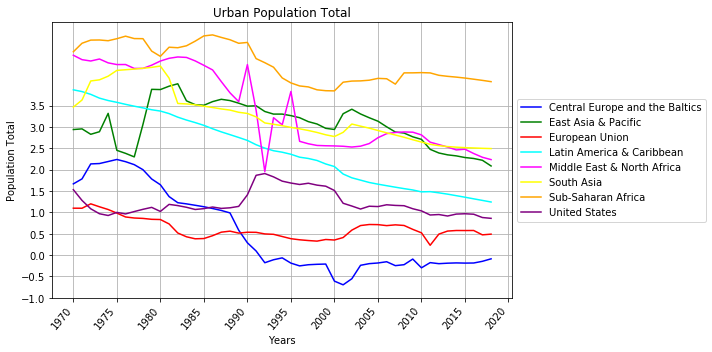

In [43]:
# Create a line graph for rural
#Create a list of years that will be used for the x-axis
years = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

plt.figure(figsize=(10,5))

# Plot line
plt.plot(years, series1, color="blue", label="Central Europe and the Baltics")
plt.plot(years, series2, color="green", label="East Asia & Pacific")
plt.plot(years, series3, color="red", label="European Union")
plt.plot(years, series4, color="cyan", label="Latin America & Caribbean")
plt.plot(years, series5, color="magenta", label="Middle East & North Africa")
plt.plot(years, series6, color="yellow", label="South Asia")
plt.plot(years, series7, color="orange", label="Sub-Saharan Africa")
plt.plot(years, series8, color="purple", label="United States")

# Place a legend on the chart
legend = plt.legend(loc="best")
legend.get_frame().set_facecolor('none')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))



plt.title("Urban Population Total")
plt.xlabel("Years")
plt.xticks(np.arange(1970,2025,5), rotation=50, ha= 'right')
plt.ylabel("Population Total")
plt.yticks(np.arange(-1, 4, 0.5))
plt.grid(True)

plt.tight_layout()
#Save the plotted figures as .pngs
plt.savefig("Urban_Total.png")

# Print our chart to the screen
plt.show()

In [33]:
# Specify the valid indicators for the Urban Total
reduced_urban_growth = Indexed_df.loc[["Urban population growth (annual %)"]]
reduced_urban_growth

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Urban population growth (annual %),Central Europe and the Baltics,1.666806,1.784406,2.134375,2.142965,2.190203,2.238276,2.186667,2.116931,1.999034,...,-0.092679,-0.297340,-0.176025,-0.200470,-0.189034,-0.182708,-0.186943,-0.184801,-0.145276,-0.087004
Urban population growth (annual %),East Asia & Pacific,2.938833,2.954147,2.827411,2.887699,3.317172,2.451882,2.381427,2.298582,3.059003,...,2.768640,2.708718,2.475440,2.389938,2.346454,2.322341,2.283787,2.261241,2.219608,2.085951
Urban population growth (annual %),European Union,1.097992,1.097018,1.200058,1.131098,1.067372,0.983137,0.892522,0.868222,0.858800,...,0.602543,0.521659,0.230293,0.491447,0.562676,0.575873,0.575049,0.576137,0.474149,0.490646
Urban population growth (annual %),Latin America & Caribbean,3.868244,3.826925,3.762015,3.673745,3.617812,3.575437,3.528508,3.485235,3.445616,...,1.524568,1.480090,1.485350,1.457512,1.426889,1.391032,1.354866,1.317033,1.280220,1.242485
Urban population growth (annual %),Middle East & North Africa,4.677179,4.573996,4.542694,4.589463,4.499332,4.459553,4.460349,4.368810,4.369661,...,2.876895,2.812919,2.642577,2.586169,2.528950,2.461704,2.478114,2.377594,2.289728,2.234919
Urban population growth (annual %),South Asia,3.464146,3.629888,4.075608,4.102264,4.187298,4.322763,4.338366,4.353178,4.372667,...,2.699647,2.645396,2.593543,2.561402,2.539868,2.526186,2.515263,2.507410,2.499326,2.493358
Urban population growth (annual %),Sub-Saharan Africa,4.758931,4.958423,5.031708,5.034620,5.017430,5.064822,5.123886,5.067569,5.065289,...,4.265583,4.270726,4.264199,4.208096,4.184096,4.165762,4.143361,4.116811,4.089451,4.059144
Urban population growth (annual %),United States,1.531152,1.279278,1.084106,0.968059,0.927240,0.999565,0.963796,1.019346,1.071789,...,1.085290,1.035003,0.938733,0.949583,0.914905,0.960162,0.967793,0.956993,0.879600,0.860433


In [34]:
#Move the Indicator Name index back into a column
reduced_urban_growth2 = reduced_urban_growth.reset_index(level='Indicator Name')
reduced_urban_growth2.head()

,Indicator Name,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Urban population growth (annual %),Central Europe and the Baltics,1.666806,1.784406,2.134375,2.142965,2.190203,2.238276,2.186667,2.116931,...,-0.092679,-0.297340,-0.176025,-0.200470,-0.189034,-0.182708,-0.186943,-0.184801,-0.145276,-0.087004
1,Urban population growth (annual %),East Asia & Pacific,2.938833,2.954147,2.827411,2.887699,3.317172,2.451882,2.381427,2.298582,...,2.768640,2.708718,2.475440,2.389938,2.346454,2.322341,2.283787,2.261241,2.219608,2.085951
2,Urban population growth (annual %),European Union,1.097992,1.097018,1.200058,1.131098,1.067372,0.983137,0.892522,0.868222,...,0.602543,0.521659,0.230293,0.491447,0.562676,0.575873,0.575049,0.576137,0.474149,0.490646
3,Urban population growth (annual %),Latin America & Caribbean,3.868244,3.826925,3.762015,3.673745,3.617812,3.575437,3.528508,3.485235,...,1.524568,1.480090,1.485350,1.457512,1.426889,1.391032,1.354866,1.317033,1.280220,1.242485
4,Urban population growth (annual %),Middle East & North Africa,4.677179,4.573996,4.542694,4.589463,4.499332,4.459553,4.460349,4.368810,...,2.876895,2.812919,2.642577,2.586169,2.528950,2.461704,2.478114,2.377594,2.289728,2.234919


In [35]:
# Reorganize the columns where Country Name comes before Indicator Name
organized_urban_growth = reduced_urban_growth2[["Country Name","1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
organized_urban_growth.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,1.666806,1.784406,2.134375,2.142965,2.190203,2.238276,2.186667,2.116931,1.999034,...,-0.092679,-0.297340,-0.176025,-0.200470,-0.189034,-0.182708,-0.186943,-0.184801,-0.145276,-0.087004
1,East Asia & Pacific,2.938833,2.954147,2.827411,2.887699,3.317172,2.451882,2.381427,2.298582,3.059003,...,2.768640,2.708718,2.475440,2.389938,2.346454,2.322341,2.283787,2.261241,2.219608,2.085951
2,European Union,1.097992,1.097018,1.200058,1.131098,1.067372,0.983137,0.892522,0.868222,0.858800,...,0.602543,0.521659,0.230293,0.491447,0.562676,0.575873,0.575049,0.576137,0.474149,0.490646
3,Latin America & Caribbean,3.868244,3.826925,3.762015,3.673745,3.617812,3.575437,3.528508,3.485235,3.445616,...,1.524568,1.480090,1.485350,1.457512,1.426889,1.391032,1.354866,1.317033,1.280220,1.242485
4,Middle East & North Africa,4.677179,4.573996,4.542694,4.589463,4.499332,4.459553,4.460349,4.368810,4.369661,...,2.876895,2.812919,2.642577,2.586169,2.528950,2.461704,2.478114,2.377594,2.289728,2.234919


In [36]:
organized_urban_growth2 = organized_urban_growth.set_index("Country Name")
organized_urban_growth2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,1.666806,1.784406,2.134375,2.142965,2.190203,2.238276,2.186667,2.116931,1.999034,1.781703,...,-0.092679,-0.297340,-0.176025,-0.200470,-0.189034,-0.182708,-0.186943,-0.184801,-0.145276,-0.087004
East Asia & Pacific,2.938833,2.954147,2.827411,2.887699,3.317172,2.451882,2.381427,2.298582,3.059003,3.879506,...,2.768640,2.708718,2.475440,2.389938,2.346454,2.322341,2.283787,2.261241,2.219608,2.085951
European Union,1.097992,1.097018,1.200058,1.131098,1.067372,0.983137,0.892522,0.868222,0.858800,0.837758,...,0.602543,0.521659,0.230293,0.491447,0.562676,0.575873,0.575049,0.576137,0.474149,0.490646
Latin America & Caribbean,3.868244,3.826925,3.762015,3.673745,3.617812,3.575437,3.528508,3.485235,3.445616,3.401890,...,1.524568,1.480090,1.485350,1.457512,1.426889,1.391032,1.354866,1.317033,1.280220,1.242485
Middle East & North Africa,4.677179,4.573996,4.542694,4.589463,4.499332,4.459553,4.460349,4.368810,4.369661,4.444723,...,2.876895,2.812919,2.642577,2.586169,2.528950,2.461704,2.478114,2.377594,2.289728,2.234919
South Asia,3.464146,3.629888,4.075608,4.102264,4.187298,4.322763,4.338366,4.353178,4.372667,4.394142,...,2.699647,2.645396,2.593543,2.561402,2.539868,2.526186,2.515263,2.507410,2.499326,2.493358
Sub-Saharan Africa,4.758931,4.958423,5.031708,5.034620,5.017430,5.064822,5.123886,5.067569,5.065289,4.774440,...,4.265583,4.270726,4.264199,4.208096,4.184096,4.165762,4.143361,4.116811,4.089451,4.059144
United States,1.531152,1.279278,1.084106,0.968059,0.927240,0.999565,0.963796,1.019346,1.071789,1.117148,...,1.085290,1.035003,0.938733,0.949583,0.914905,0.960162,0.967793,0.956993,0.879600,0.860433


In [37]:
# Create a CSV file for rural
organized_urban_growth2.to_csv("Population-Estimates_Urban_Growth_Ian.csv",
                  index=False, header=True)

In [38]:
# Create a series for 1970-2018
series1 = organized_urban_growth2.loc["Central Europe and the Baltics"]
series2 = organized_urban_growth2.loc["East Asia & Pacific"]
series3 = organized_urban_growth2.loc["European Union"]
series4 = organized_urban_growth2.loc["Latin America & Caribbean"]
series5 = organized_urban_growth2.loc["Middle East & North Africa"]
series6 = organized_urban_growth2.loc["South Asia"]
series7 = organized_urban_growth2.loc["Sub-Saharan Africa"]
series8 = organized_urban_growth2.loc["United States"]

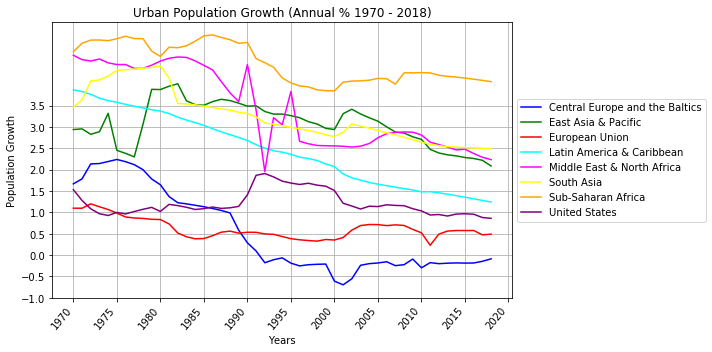

In [42]:
# Create a line graph for rural
#Create a list of years that will be used for the x-axis
years = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

plt.figure(figsize=(10,5))
# Plot line
plt.plot(years, series1, color="blue", label="Central Europe and the Baltics")
plt.plot(years, series2, color="green", label="East Asia & Pacific")
plt.plot(years, series3, color="red", label="European Union")
plt.plot(years, series4, color="cyan", label="Latin America & Caribbean")
plt.plot(years, series5, color="magenta", label="Middle East & North Africa")
plt.plot(years, series6, color="yellow", label="South Asia")
plt.plot(years, series7, color="orange", label="Sub-Saharan Africa")
plt.plot(years, series8, color="purple", label="United States")

# Place a legend on the chart
legend = plt.legend(loc="best")
legend.get_frame().set_facecolor('none')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title("Urban Population Growth (Annual % 1970 - 2018)")
plt.xlabel("Years")
plt.xticks(np.arange(1970,2025,5), rotation=50, ha= 'right')
plt.ylabel("Population Growth")
plt.yticks(np.arange(-1, 4, 0.5))
plt.grid(True)



plt.tight_layout()


#Save the plotted figures as .pngs
plt.savefig("Urban_Growth.png")

# Print our chart to the screen
plt.show()

### QUESTION: What countries within Europe have the greatest growth in movement to urban areas/leaving rural areas

Middle East & North Africa
East Asia & the Pacific has had the greatest  movement from leaving the rural areas and moving towards the urban areas.
Latin America and the Carribean